In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [257]:
cambiar=['new granada energy corporation sucursal colombia','colombia energy development co',"alange energy corp suc colombia","amerisur exploracion colombia ltd","canacol energy colombia sa","cne oil & gas sas","colombia energy development",'compañia operadora pts petrocolombia sa copp sa','consorcio campos de produccion ccp','ecopetrol alto magdalena',"ecopetrol d sur",'ecopetrol llanos'
 'ecopetrol sa','emerald energy plc sucursal colombia','equion energia limited','frontera energy colombia corp sucursal colombia','geopark colombia pn sa sucursal colombia (winchester)', 'geopark colombia sas','geopark cuerva sucursal colombia ll (hupecol ll caracara)',"geoproduction oil and gas company of colombia",'grupo c&c energia barbados sucursal colombia','hupecol operating co llc','hupecol operating collc','interoil colombia e&p','las quinchas resource corp surcursal colombia','las quinchas resource corp – sucursal colombia','lewis energy colombia inc','lewis energy colombia, inc','meta petroleum corp','new granada energy corporation','new granada energy corporation (hupecol ll)','nikoil energy corp sucursal colombia','occidental de colombia , llc','occidental de colombia llc','omniaenergy inc sucursal colombia en reorganizacion (antes santa maria petroleum inc)','ongc videsh limited sucursal colombiana','p1 energy delta corp sucursal colombia','pacific stratus energy colombia corp','parex resources colombia ltd','parex resources colombia ltd sucursal','perenco oil and gas colombia limited','petroleos sud americanos sucursal colombia','petropuli sas','petrosantander (colombia inc)','sogomi energy sa','tabasco oil company llc','tpl colombia ltd sucursal colombia antes panatlantic colombia ltd sucursal en colombia','vetra exploracion y produccion colombia sa','vetra exploracion y produccion colombia sas antes petrotesting colombia']
new=['new granada energy co','colombia energy development','alange energy',"amerisur exploracion colombia","canacol energy colombia sas","cne oil and gas sas","colombia energy development",'compañia operadora petrocolombia sas copp','consorcio campos de produccion',"ecopetrol","ecopetrol","ecopetrol",'emerald energy de colombia plc','equion energia ltd','frontera energy','geopark colombia pn sa',"geopark colombia pn sa","geopark colombia pn sa",'geoproduction oil & gas company',"grupo c&c energia (barbados) sucursal colombia",'hupecol llc','hupecol llc','interoil colombia exploration and production','las quinchas resource corp','las quinchas resource corp','lewis energy colombia','meta petroleum','new granada energy co','new granada energy co','nikoil energy corp','occidental de colombia inc','occidental de colombia inc','occidental de colombia inc','omniaenergy inc sucursal colombia en reorganizacion',"ongc videsh limited",'p1 energy delta corp','pacific stratus energy','parex resources colombia','parex resources colombia','perenco colombia limited','petroleos sudamericanos','petropuli ltda','petrosantander (colombia) inc','sogomy energy','tabasco oil company', 'tpl colombia ltd sucursal colombia','vetra exploracion y produccion colombia sas','vetra exploracion y produccion colombia sas']

df = pd.read_excel('Output//ANH_wide.xlsx', sheetname='Sheet1')
df2=df.copy()
def cambiarempresa(text):
    for i in range(len(cambiar)):
        if text == cambiar[i]:
            text=new[i]
    return text
df2["Empresa"]=df["Empresa"].apply(lambda x: cambiarempresa(x))

empresas = df2['Empresa']
empresas.sort_values()
unicos = empresas.unique()
unicos.sort()

C:\Users\David Guarin\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


              campo         total
288        rubiales  1.121182e+07
256        castilla  5.735135e+06
253      chichimene  3.989151e+06
301           quifa  3.831841e+06
252  castilla norte  3.538662e+06


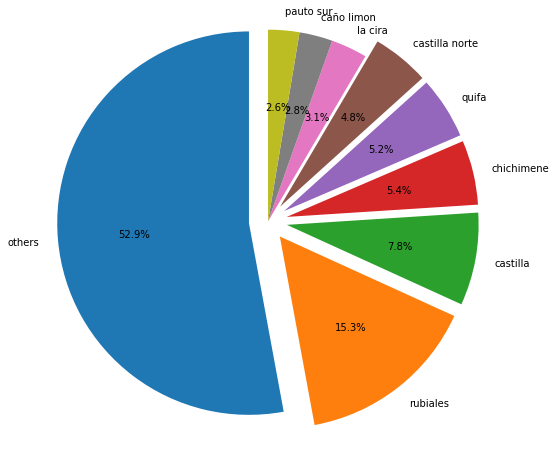

In [259]:
def ptoUno(df): 
    total = df['Enero']+df['Febrero']+df['Marzo']+df['Abril']+df['Mayo']+df['Junio']+df['Julio']+df['Agosto']+df['Septiembre']+df['Octubre']+df['Noviembre']+df['Diciembre']
    df['total'] = total
    l_campos=df.Campo.unique()
    campos=[] #arreglo que guarda la produccion total de cada uno de los campos
    n_campo=[]#arreglo que guarda el nombre de cada uno de los campos
    for i in l_campos:
        campos.append(sum(df["total"].loc[df["Campo"] == i])) #suma la produccion de todas las operadoras con actividad en el campo i
        n_campo.append(i)
        
    orden=pd.DataFrame(columns=["campo","total"]) #dataframe que devuelve los 5 campos con más producción
    orden["campo"]=n_campo
    orden["total"]=campos
    orden=orden.sort_values('total', ascending=False)
    print(orden.head(5))
    orden=pd.DataFrame(columns=["campo","total"])
    orden["campo"]=n_campo
    orden["total"]=campos
    orden=orden.sort_values('total', ascending=False)

    others=sum(orden["total"])-sum(orden["total"].head(8))
    m=orden["total"].head(8).values
    empr=orden["campo"].head(8).values

    names=["others"]
    val=[others]
    for i in range(len(m)):
        val.append(m[i])
        names.append(empr[i])

    plt.rcParams['figure.figsize'] = [8,8]
    fig1, ax1 = plt.subplots()
    ax1.pie(val, labels=names, autopct='%1.1f%%',
            shadow=False, startangle=90, explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0,0,0))
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
ptoUno(df2)

[[6, 'cepsa colombia sa'], [6, 'colombia energy development'], [6, 'new granada energy co'], [7, 'parex resources colombia'], [10, 'ecopetrol sa'], [22, 'geopark colombia pn sa'], [36, 'perenco colombia limited'], [37, 'frontera energy']]


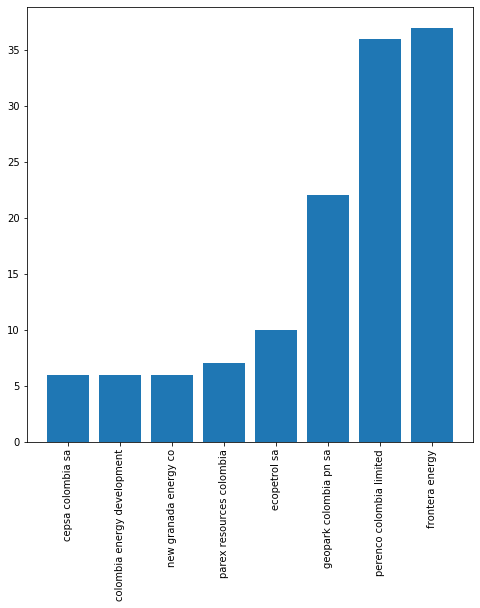

In [261]:

def puntoDos(df):
    
    casanare = df.loc[df['Departamento'] == 'casanare']
    casanare2018 = casanare.loc[casanare['Year']==2018]
    empresas = casanare2018['Empresa'].unique()
    empresas.sort()
    result = []
    todos = []
    for i in range(0,len(empresas)):
        if len(casanare2018.loc[casanare2018['Empresa'] == empresas[i]]) > 5:
            result.append([len(casanare2018.loc[casanare2018['Empresa'] == empresas[i]]),empresas[i]])
        todos.append([empresas[i], len(casanare2018.loc[casanare2018['Empresa'] == empresas[i]])])
    result.sort()
    
    em=[] #empresas con más de 5 actividades en casanare
    t=[] #numero de actividades en casanare por cada empresa
    for i,j in result: #separar los dos valores de la tupla retornada de la funicon PuntoDos
        em.append(j)
        t.append(i)
    plt.xticks(rotation='vertical')
    plt.bar(em,t) 
    print(result)
puntoDos(df2)

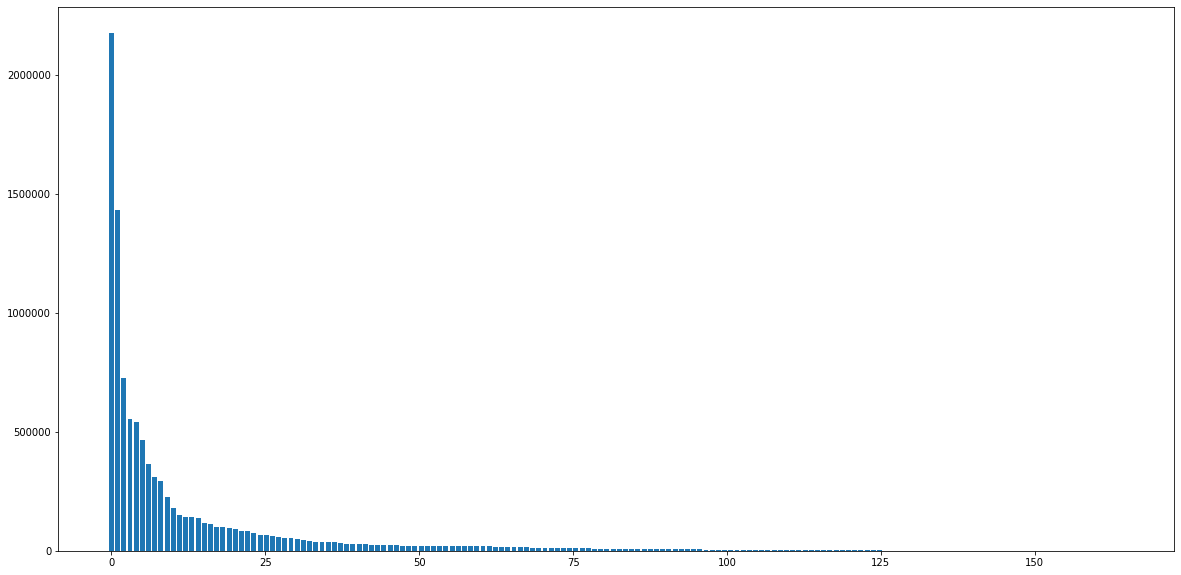

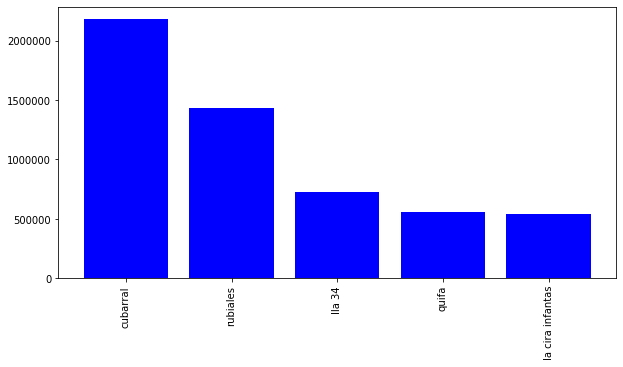

       valorTotal          Contrato
108  2.177189e+06          cubarral
114  1.433612e+06          rubiales
59   7.255796e+05            lla 34
117  5.544383e+05             quifa
140  5.424151e+05  la cira infantas


In [264]:
def PuntoTres(df):
    total = df['Enero']+df['Febrero']+df['Marzo']+df['Abril']+df['Mayo']+df['Junio']+df['Julio']+df['Agosto']+df['Septiembre']+df['Octubre']+df['Noviembre']+df['Diciembre']
    df['total'] = total
    year2018 = df.loc[df['Year']==2018]
    contratos = year2018['Contrato'].unique()
    
    valorTotal = []
    for i in range(0, len(contratos)):
        valorContrato = year2018.loc[df['Contrato']==contratos[i]]['total'].sum()
        valorTotal.append([valorContrato, contratos[i]])
    dfContrato = pd.DataFrame(valorTotal, columns=['valorTotal','Contrato'])
    resultado  = dfContrato.nlargest(5, 'valorTotal')[['valorTotal','Contrato']]
    total = dfContrato.nlargest(len(empresas), 'valorTotal')[['Contrato','valorTotal']]
    
    x = resultado['Contrato']
    y = resultado['valorTotal']
    ytotal = total['valorTotal']
    xtotal = np.linspace(0,len(ytotal), num = len(ytotal))
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.figure()
    plt.bar(xtotal, ytotal)
    plt.show()
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.figure()
    plt.bar(x,y, color = 'blue')
    plt.xticks(rotation='vertical')
    plt.show()
    print(resultado)
    
    #Grafica en barras del 2018
        
PuntoTres(df2)

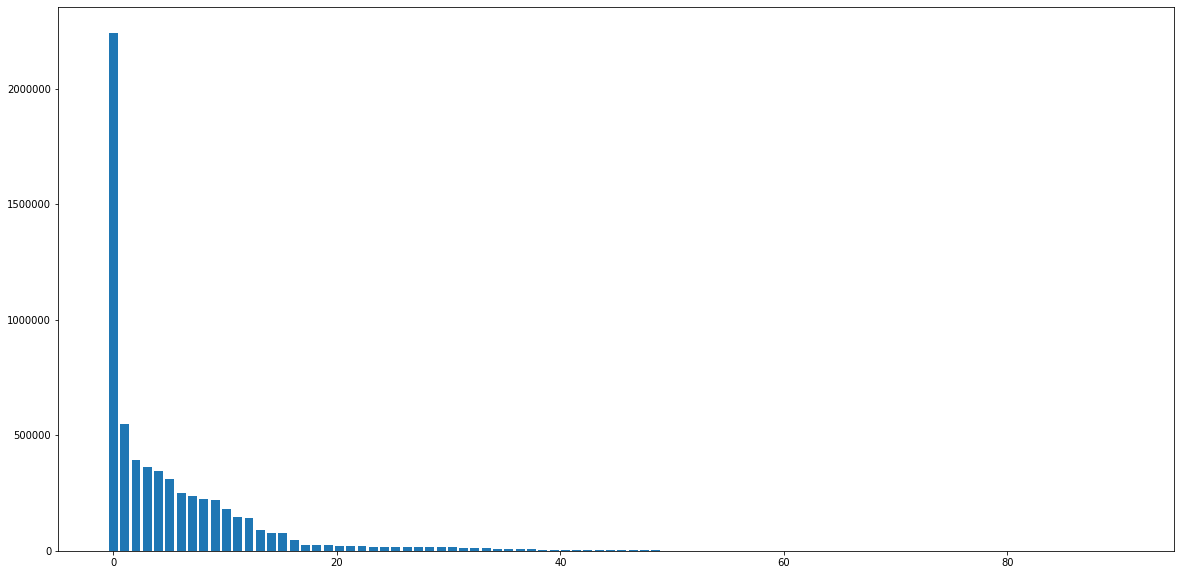

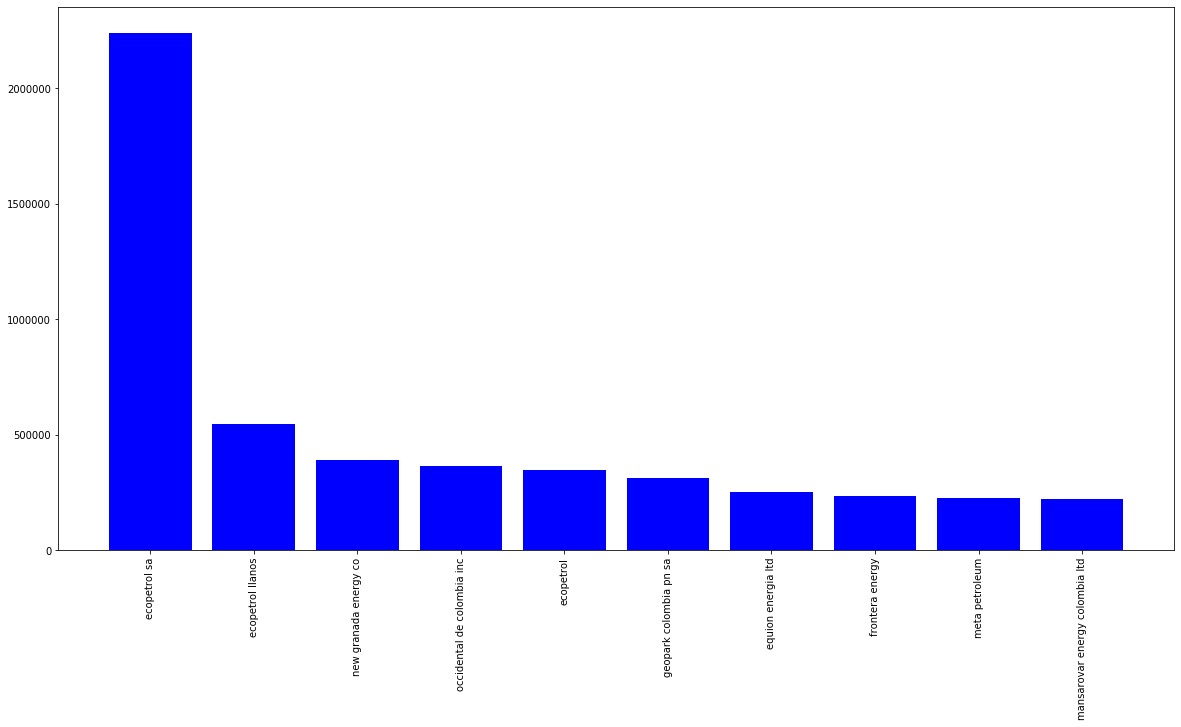

                           Empresa  ValorTotalMes
0                     ecopetrol sa   2.240283e+06
45                ecopetrol llanos   5.477165e+05
16           new granada energy co   3.927234e+05
2       occidental de colombia inc   3.627661e+05
43                       ecopetrol   3.457141e+05
24          geopark colombia pn sa   3.118003e+05
7               equion energia ltd   2.512061e+05
14                 frontera energy   2.359722e+05
46                  meta petroleum   2.258275e+05
1   mansarovar energy colombia ltd   2.201046e+05


In [263]:
def PuntoCuatro(df):
    
    #Organizar empresas
    empresas = df['Empresa'].unique()
    valorEmpresa = []
    for i in range(0, len(empresas)):
        valorEmpresa.append([df.loc[df['Empresa']==empresas[i]]['Agosto'].sum(), empresas[i]])
    dfEmpresa = pd.DataFrame(valorEmpresa, columns=['ValorTotalMes','Empresa'])
    resultado  = dfEmpresa.nlargest(10, 'ValorTotalMes')[['Empresa','ValorTotalMes']]
    total = dfEmpresa.nlargest(len(empresas), 'ValorTotalMes')[['Empresa','ValorTotalMes']]
    
    x = resultado['Empresa']
    y = resultado['ValorTotalMes']
    ytotal = total['ValorTotalMes']
    xtotal = np.linspace(0,len(ytotal), num = len(ytotal))
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.figure()
    plt.bar(xtotal,ytotal)
    plt.show()
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.figure()
    plt.bar(x,y, color = 'blue')
    plt.xticks(rotation='vertical')
    plt.show()
    print(resultado)
    #Dos graficas las totales y una solo las 10 en barra. 
    
    
PuntoCuatro(df2)

<Figure size 720x720 with 0 Axes>

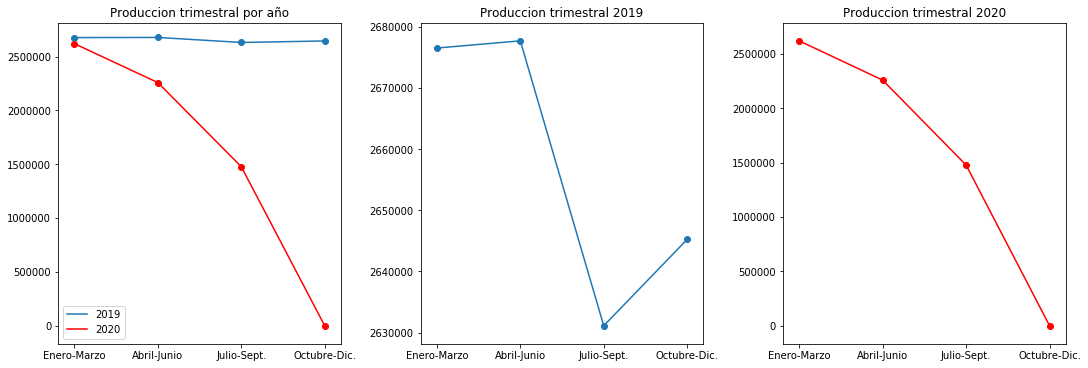

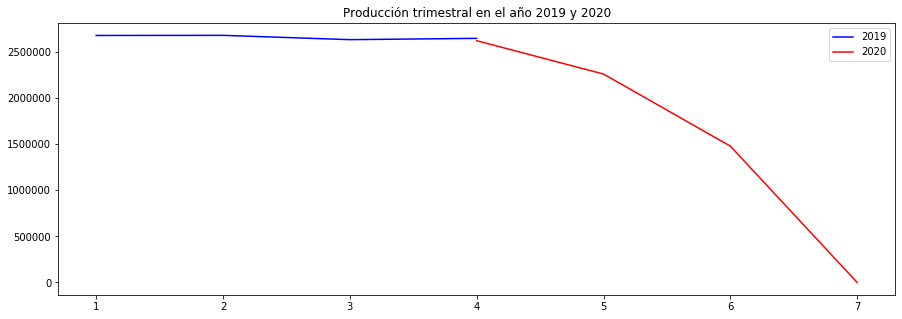

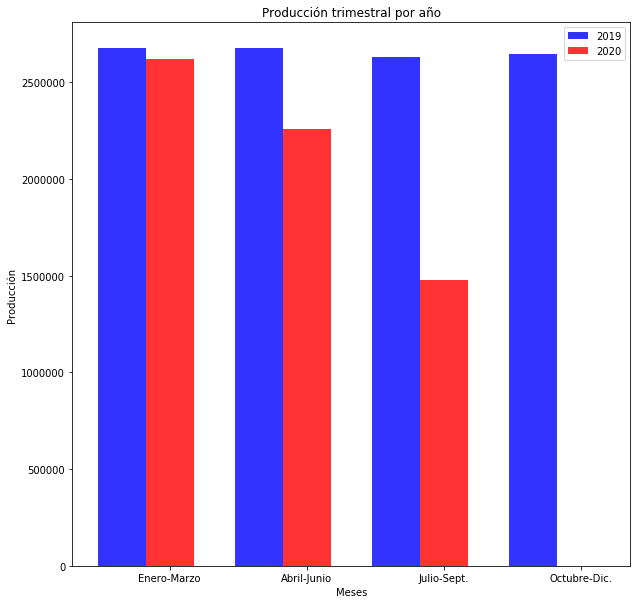

In [206]:
def PuntoCinco(df):
    trimestre_2019 = []
    trimestre_2020 = []
    columnas = df.columns.values
    tri1 = columnas[7:10]
    tri2 = columnas[10:13]
    tri3 = columnas[13:16]
    tri4 = columnas[16:20]
    tri = [tri1, tri2, tri3, tri4]
    trix = ['Enero-Marzo', 'Abril-Junio','Julio-Sept.','Octubre-Dic.']
    trix1 = [1, 2,3,4]
    trix2 = [4, 5,6,7]
    for i in range(len(tri)):
        trimestre_2019.append(df.loc[df['Year']==2019][tri[i][0]].sum()+ df.loc[df['Year']==2019][tri[i][1]].sum()+ df.loc[df['Year']==2019][tri[i][2]].sum())
        trimestre_2020.append(df.loc[df['Year']==2020][tri[i][0]].sum()+ df.loc[df['Year']==2020][tri[i][1]].sum()+ df.loc[df['Year']==2020][tri[i][2]].sum())
    
    import matplotlib.pyplot as plt
    
    
    #Figura 1
    plt.figure()
    plt.rcParams['figure.figsize'] = [15, 5]
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True)
    ax1.plot(trix, trimestre_2019, label =2019)
    ax1.scatter(trix, trimestre_2019)
    ax1.plot(trix, trimestre_2020, color= 'red', label = 2020)
    ax1.scatter(trix, trimestre_2020, color = 'red')
    ax1.title.set_text('Produccion trimestral por año')
    ax1.legend()

 
    ax2.plot(trix, trimestre_2019)
    ax2.scatter(trix, trimestre_2019)
    ax2.title.set_text('Produccion trimestral 2019')
    
    ax3.plot(trix, trimestre_2020, color='red')
    ax3.scatter(trix, trimestre_2020, color = 'red')
    ax3.title.set_text('Produccion trimestral 2020')
    
    plt.show()
    
    ######################
    #Figura 2
    
    plt.figure()
    plt.rcParams['figure.figsize'] = [10, 10]
    
    plt.plot(trix1, trimestre_2019, color ='b', label = '2019')
    plt.plot(trix2, trimestre_2020, color = 'r', label = '2020')
    plt.title('Producción trimestral en el año 2019 y 2020')
    plt.legend()
    plt.show()
    
    #Figura 3
    plt.figure()
    
    
    index = np.arange(4)

    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, trimestre_2019, bar_width,
    alpha=opacity,
    color='b',
    label='2019')

    rects2 = plt.bar(index + bar_width, trimestre_2020, bar_width,
    alpha=opacity,
    color='r',
    label='2020')

    plt.xlabel('Meses')
    plt.ylabel('Producción')
    plt.title('Producción trimestral por año')
    plt.xticks(index + bar_width, ('Enero-Marzo', 'Abril-Junio','Julio-Sept.','Octubre-Dic.'))
    plt.legend()

    plt.show()
    
PuntoCinco(df2)
    ##Con Noguera

C:\Users\David Guarin\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
